#Tone mapping

LTMNet (corrected version): https://drive.google.com/drive/folders/13EQ7NA-Z73LIbug4GlbOkeCrd_IGI9Vd?usp=share_link 

Датасет HDR+: https://hdrplusdata.org/ 

1.Из-за ограничений памяти на колабе загружаю по 300 изображений из директорий burst и results_20171023 (https://console.cloud.google.com/storage/browser/hdrplusdata/20171106?pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false )

2.Препроцессинг датасета и загрузка на гугл диск

3.Освобождаем память на колабе

4.Повторять шаги 1, 2 и 3, пока не загрузим датасет на гугл диск

## Загрузка датасета(HDR+) в google colab

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

Streaming output truncated to the last 5000 lines.
google-cloud-sdk/lib/surface/scc/custom_modules/sha/test.yaml
google-cloud-sdk/lib/surface/scc/custom_modules/sha/update.yaml
google-cloud-sdk/lib/surface/scc/findings/__init__.py
google-cloud-sdk/lib/surface/scc/findings/bulk_mute.yaml
google-cloud-sdk/lib/surface/scc/findings/create.yaml
google-cloud-sdk/lib/surface/scc/findings/group.yaml
google-cloud-sdk/lib/surface/scc/findings/list.yaml
google-cloud-sdk/lib/surface/scc/findings/list_marks.yaml
google-cloud-sdk/lib/surface/scc/findings/set_mute.yaml
google-cloud-sdk/lib/surface/scc/findings/update.yaml
google-cloud-sdk/lib/surface/scc/findings/update_marks.yaml
google-cloud-sdk/lib/surface/scc/muteconfigs/__init__.py
google-cloud-sdk/lib/surface/scc/muteconfigs/create.yaml
google-cloud-sdk/lib/surface/scc/muteconfigs/delete.yaml
google-cloud-sdk/lib/surface/scc/muteconfigs/get.yaml
google-cloud-sdk/lib/surface/scc/muteconfigs/list.yaml
google-cloud-sdk/lib/surface/scc/muteconfigs/

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

You must log in to continue. Would you like to log in (Y/n)?  y

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%

In [ ]:
%cd /content
!mkdir new_data
%cd new_data
!mkdir bursts
!mkdir results_20171023
%cd bursts

/content
/content/new_data
/content/new_data/bursts


In [ ]:
#1-100
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_122230_813" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_155556_409" \
  "gs://hdrplusdata/20171106/bursts/5066_20160726_082558_304" \
  "gs://hdrplusdata/20171106/bursts/5066_20160726_113408_550" \
  "gs://hdrplusdata/20171106/bursts/5066_20160726_113513_918" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_133455_397" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_133658_940" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_135653_367" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_140101_149" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_140124_873" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_140432_582" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_141004_955" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_142118_633" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_144419_100" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_153043_735" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_162240_437" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_162924_939" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_163643_581" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_165016_381" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141005_170016_197" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_101403_693" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_102246_788" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_105302_855" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_105345_373" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_105454_336" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_105630_549" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_105758_463" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_113801_091" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_122540_393" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_122949_491" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_124019_588" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_132446_568" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_135520_132" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_135548_836" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_142550_889" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_144226_328" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_152046_066" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_153319_375" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_154035_187" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_155135_251" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_155316_300" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_155605_540" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_160913_275" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_162441_581" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_162653_141" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_162905_128" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_211729_067" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_213427_605" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141006_213702_813" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_065743_368" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_065940_018" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_070607_129" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_071115_671" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_071214_355" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_112848_533" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_112925_563" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_123014_959" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_124956_833" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_125055_698" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_135000_213" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_151031_423" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_153648_603" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_173502_483" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_173530_483" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_173602_240" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141007_191844_368" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_110242_625" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_114253_363" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_114426_094" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_114608_936" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_114756_961" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_114925_185" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_125813_565" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_135656_260" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141008_180618_598" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_121957_175" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_122048_286" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_122750_726" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_133737_056" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_143704_037" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_150027_378" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141009_173412_059" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141010_173648_475" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20141010_180937_237" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_005851_255" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_104201_909" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_104233_232" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_134650_962" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_134719_788" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_134732_725" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_134802_735" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_134833_157" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150207_161253_956" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150208_145502_285" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150208_145512_434" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150209_092856_081" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_135949_658" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_200805_680" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_200911_547" \
  .

Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/payload_N002.dng...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/rgb2rgb.txt...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/payload_N000.dng...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/payload_N001.dng...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_122230_813/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_122230_813/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_121813_812/timing.txt...
Copying gs://hdrplusdata/20171106/bursts/5066_20160724_122230_813/lens_shading_map_N002.tiff...
Copyi

In [ ]:
#200
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_201234_452" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_201603_609" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150327_201728_297" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_092827_919" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_155043_403" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_155342_009" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_155745_456" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_160138_637" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_160349_676" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_160520_398" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_160749_925" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_160846_095" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_161043_704" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_161835_347" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_162432_716" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_163105_427" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_163346_848" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_163715_895" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_164116_926" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_164411_812" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_170812_096" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_171746_975" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_171926_643" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_172144_668" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_172446_747" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_173043_297" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_173514_944" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_173812_141" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175021_426" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175115_991" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175232_109" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175320_574" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175433_221" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175629_575" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_175918_327" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_180322_431" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150328_181242_803" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_093136_401" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_093521_732" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_125046_543" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_125655_137" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_125941_989" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_151320_582" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_152141_031" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_152454_995" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_152908_281" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_155605_402" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_155925_144" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_160424_115" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_161113_291" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_162152_482" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_165620_236" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_175813_827" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_180709_560" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_180950_875" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_181327_943" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_201424_122" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_204323_804" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150403_214522_398" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_122216_530" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_123212_314" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_130410_192" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_131348_909" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_132155_318" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_132349_381" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_140239_861" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_140441_666" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_143347_471" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150404_152602_134" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150405_134840_455" \
  "gs://hdrplusdata/20171106/bursts/5a9e_20150405_165352_614" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150124_185418_341" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150124_185521_607" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150124_201237_840" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150125_141029_055" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_171156_704" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_172038_343" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_172409_745" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_172818_098" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_173422_334" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150213_173616_992" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150214_164926_312" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_163430_466" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_163504_418" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_163701_029" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_163734_147" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_163810_051" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_164323_108" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_171450_596" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_175214_360" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_175353_555" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_180549_095" \
  "gs://hdrplusdata/20171106/bursts/62CL_20150215_180737_079" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_112002_929" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_112202_698" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_112426_887" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_112816_367" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_112939_112" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113141_803" \
  .

Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/5a9e_20150327_201029_284/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#300
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113340_881" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113426_967" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113536_510" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113704_239" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_113910_619" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_114042_939" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_114209_331" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_114347_248" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_114623_545" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_115050_790" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_115249_673" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_115706_645" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_115853_902" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_120015_244" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_134800_238" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_141958_815" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_142127_997" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_142316_761" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_163158_982" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_163344_463" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164011_374" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164203_129" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164407_334" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164532_213" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164714_796" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_164845_193" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_165002_804" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_165421_129" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_165703_676" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_170301_890" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_170433_604" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_170547_585" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_170730_432" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_170922_780" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_171126_029" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_171347_212" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_171538_026" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_171735_940" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_171921_658" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_172827_846" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_173036_965" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_173407_964" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150303_174338_942" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_110132_299" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_110351_470" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_114949_588" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_115237_712" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_125050_425" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_125250_991" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_131130_552" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_131704_518" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_135941_723" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_141508_553" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_142502_697" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_144700_454" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_145407_807" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_150747_547" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_151040_297" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_153355_468" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_153527_809" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_153729_697" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_154113_351" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_154348_452" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150307_215759_906" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150308_122228_886" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150308_124743_545" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150308_130849_627" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_113841_135" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_114005_843" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_114140_424" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_114339_694" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_114418_018" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_114842_635" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_115209_279" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_115414_118" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_115857_642" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_120656_949" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_120806_002" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_120940_991" \
  "gs://hdrplusdata/20171106/bursts/6FHF_20150331_121129_927" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_072320_332" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_072500_486" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_122748_543" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_132809_521" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_132920_588" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_133019_716" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_133145_646" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_133352_994" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_133443_316" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_133932_228" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_134021_883" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_135224_980" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143019_798" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143129_568" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143358_534" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143446_533" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143759_800" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_143853_529" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_154158_446" \
  .

Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/6FHF_20150303_113244_343/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#400
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163447_739" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163516_360" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163718_374" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163754_550" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163855_834" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_163944_816" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164033_026" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164205_458" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164429_082" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164518_474" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164618_967" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164729_482" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_164954_725" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_165544_629" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_170702_579" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_171305_444" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150307_175028_814" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150308_142824_049" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150308_142910_082" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150308_143934_547" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150308_153308_901" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150308_153351_531" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150310_214842_527" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150311_213004_782" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150311_224124_637" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150312_210559_972" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150312_211340_717" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150313_180732_465" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150313_223706_291" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_102852_667" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_153256_829" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_153413_862" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_155743_909" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_155807_295" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_155841_086" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_162509_995" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150314_163730_696" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150317_065624_640" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150317_070131_937" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150317_192221_745" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150317_221108_787" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150320_090042_770" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_121515_830" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_121804_401" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_122134_942" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_122503_254" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_123433_994" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_124154_288" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_124944_821" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_125024_144" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_125334_875" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_130156_946" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_130558_040" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_130833_545" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_131401_885" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_131546_612" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_132525_244" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_132654_786" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_132737_699" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_132848_847" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133007_750" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133158_176" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133255_034" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133419_065" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133525_122" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133636_123" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133837_611" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_133952_197" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_140506_388" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_140543_053" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_142733_882" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_145055_658" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_145749_377" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_151647_825" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_151731_981" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_151858_636" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_151956_104" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_152821_559" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_153108_835" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_153955_393" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_155002_774" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150321_184320_157" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150323_174813_292" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150323_175101_950" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_212857_410" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_214342_485" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_214448_325" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_214643_273" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_214840_232" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_215003_680" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_215121_390" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_215257_828" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_215438_078" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150324_224756_695" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_083935_838" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_084014_332" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_085944_085" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090049_757" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090246_056" \
  .

Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150307_163253_873/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#500
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090508_481" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090638_500" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_090754_257" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_104617_962" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_105827_075" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_112800_577" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_113017_433" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_113148_621" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_113322_882" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_113420_008" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_134507_096" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_204303_317" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_221051_146" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150325_221823_719" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150326_002210_987" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150326_063255_979" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150326_063524_609" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150326_065154_863" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150326_071447_036" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150327_201310_442" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_121222_191" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_145451_575" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_154406_315" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_154829_947" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_155142_128" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_155502_330" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_155840_881" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_160145_189" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_160326_861" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_160426_633" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_160532_026" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_160857_193" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_161348_719" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_161605_904" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_162917_997" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_163149_545" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_163408_727" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_163754_240" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_164127_854" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_165011_650" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_165555_633" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_165857_698" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_170257_917" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_170747_463" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_170953_945" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_171441_639" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_171749_430" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_172143_069" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_172249_650" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_172441_800" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_173054_283" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_173924_521" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_174642_031" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_174816_730" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_175246_331" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_175357_922" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_182656_004" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_183029_897" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_191608_226" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_191742_136" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_192124_979" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_194343_379" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150328_194924_423" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150329_162911_300" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_124906_170" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_132310_827" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_151957_266" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_152401_583" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_152634_142" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_153940_451" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_154527_755" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_154711_214" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_154927_473" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_155839_711" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_160129_600" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_161201_007" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_163241_276" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_165447_317" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_165723_505" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_165918_589" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_172319_794" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_174605_886" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_175442_492" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_180635_147" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_180848_802" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_181052_205" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_181933_693" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_190209_389" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_201325_047" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150403_202341_352" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_000817_536" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_001054_931" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_001230_965" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_001349_892" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_001600_229" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_095958_732" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_103240_200" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_105554_846" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_110815_486" \
  .

Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150325_090410_124/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#600
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_130348_582" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_132319_709" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_132524_360" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_132758_328" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_140420_225" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_140613_655" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_161737_714" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_180115_918" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150404_181450_714" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150408_110030_582" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150408_131707_351" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150408_211805_558" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150408_213725_267" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150409_064515_025" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150409_065235_624" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150409_201833_549" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150409_220353_794" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150409_224902_070" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_063033_818" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_063210_560" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_063319_215" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_063523_792" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_093713_601" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150410_100633_669" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_121559_231" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_121756_361" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_121953_732" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_122218_768" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_122636_053" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_122934_265" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_123126_272" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_123508_368" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_125448_583" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_131917_938" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_132109_651" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_132343_820" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_153649_883" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_155608_246" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_160002_625" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_180814_070" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_183803_226" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_184008_205" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150411_185852_060" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150412_172559_820" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150412_173215_041" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150412_185646_699" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150412_185825_365" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150413_161622_470" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150413_161826_619" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150413_163215_207" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150414_225105_789" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_135009_426" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_135106_727" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_135337_487" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_135540_793" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_183910_626" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_184953_166" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_185322_439" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_185507_081" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_194857_576" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_195748_820" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_200543_184" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_200720_130" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150415_201908_091" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150417_063859_191" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150417_064208_250" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150417_185141_031" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150418_221014_105" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150418_234936_430" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150418_235232_346" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150418_235428_090" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150419_001107_999" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150419_023348_725" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150419_024132_249" \
  "gs://hdrplusdata/20171106/bursts/6G7M_20150421_121002_835" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_013252_908" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_013858_077" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_105003_812" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_110209_412" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_111552_348" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_112414_876" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_113415_066" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_113657_355" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_114403_374" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_120602_030" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_121443_250" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_161740_584" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_162107_977" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_171213_552" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_171611_533" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_172135_462" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_172517_754" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_173321_675" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_173806_301" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_174036_006" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150818_174651_354" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150820_211653_358" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150820_211911_004" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_102858_566" \
  .

Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/6G7M_20150404_121844_208/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#700
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_151547_314" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_154514_762" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_224442_767" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150822_224741_700" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_203520_333" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_203920_301" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_204044_938" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_204210_479" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_204230_368" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_204344_777" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_210544_967" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_210856_644" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_211050_331" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_211334_502" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_211636_935" \
  "gs://hdrplusdata/20171106/bursts/9bf4_20150824_211843_060" \
  "gs://hdrplusdata/20171106/bursts/9dd3_20151219_140827_453" \
  "gs://hdrplusdata/20171106/bursts/9dd3_20151219_141013_466" \
  "gs://hdrplusdata/20171106/bursts/9dd3_20151219_141136_915" \
  "gs://hdrplusdata/20171106/bursts/IMG_20160813_120019_091" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_122931_660" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_142943_533" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_143025_752" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_143053_529" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_143810_432" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_150212_918" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_153448_511" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_153543_764" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_153630_516" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_193013_027" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_193105_564" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_212448_278" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150312_212616_288" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150313_125629_886" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150313_125718_326" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150917_150743_926" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150918_191516_946" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150918_191802_675" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150918_191941_627" \
  "gs://hdrplusdata/20171106/bursts/J6VL_20150918_192103_952" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_151305_158" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_151616_258" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_151923_483" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_152248_511" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_152431_778" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_152750_288" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_153110_727" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_153251_204" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_153555_685" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_153910_977" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_154219_992" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_154545_287" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_175702_260" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_175849_717" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_180019_950" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_180208_452" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_180333_476" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_180542_401" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_180844_031" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_181019_044" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_181352_795" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_181459_913" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_182800_017" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_183124_341" \
  "gs://hdrplusdata/20171106/bursts/J6ZC_20150408_183238_027" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_181318_697" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_183334_317" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_183349_914" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_184251_978" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_184601_742" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_184622_115" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150319_221026_313" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150321_145120_500" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_113032_513" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_113215_615" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_115405_813" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_120600_100" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_141124_427" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_143321_433" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_144437_178" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_145544_208" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150324_145957_989" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150327_203236_994" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_172829_127" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_174103_642" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_180912_562" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_181028_350" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_181324_374" \
  "gs://hdrplusdata/20171106/bursts/JN34_20150328_181615_759" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150817_233032_922" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150817_234050_879" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_105433_728" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_110335_698" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_110344_258" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_111032_862" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_111842_538" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_113445_197" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_113723_879" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_114520_447" \
  .

Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/9bf4_20150822_141800_323/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#800
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_161852_215" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_162155_195" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_171325_401" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_171640_241" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_172208_763" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_172558_552" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_173406_968" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150818_173835_771" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150822_191202_436" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_111847_392" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_124340_093" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_124513_068" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_124655_015" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_134936_003" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_140335_522" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_141112_746" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_142209_889" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_143532_435" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_144816_359" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_145230_537" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_150110_645" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_150230_285" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_150348_372" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_151427_286" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_151740_448" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_152233_501" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_152633_092" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_153217_827" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_154106_824" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_155229_854" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_155507_272" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_155636_719" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_155814_484" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_161252_715" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_161616_202" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_162009_933" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_162341_114" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_162853_409" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_163826_504" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_170322_818" \
  "gs://hdrplusdata/20171106/bursts/bee7_20150829_170455_997" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20141007_234653_917" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20141007_234744_960" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20141007_235657_307" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150109_171200_810" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150115_172542_156" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150115_172551_734" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150222_151127_644" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150222_151204_652" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150226_144326_422" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150228_213436_045" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_113016_407" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_113107_851" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_195156_050" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_195432_970" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_195513_280" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_204109_584" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_204258_018" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150311_210913_016" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_132521_894" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_133509_010" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_141022_171" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_204705_173" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_204743_218" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_205107_395" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_205159_315" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_205341_059" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_205511_733" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_205541_959" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150312_213906_682" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_152445_970" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_152612_586" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_152803_799" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_152919_339" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_153131_632" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_153305_211" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_153645_853" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_153838_386" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_154240_395" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_154511_377" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_183259_217" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_201933_915" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_202032_222" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150408_202135_998" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_183828_728" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_191138_011" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_191810_374" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_192343_588" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_192545_763" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_192800_654" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_192955_365" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_193600_862" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_201100_596" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_203526_981" \
  "gs://hdrplusdata/20171106/bursts/c1b1_20150424_203727_155" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_105412_265" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_110115_756" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_110644_015" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_114634_210" \
  .

Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/bee7_20150818_120642_572/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#840
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_114931_506" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_173210_443" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_174845_909" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_175008_932" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_194029_165" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_194031_640" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_195104_564" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_195108_436" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_195129_929" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_195159_785" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_203328_514" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_203341_700" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_203352_369" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_203701_715" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_211258_521" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_211301_691" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_211303_855" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_214630_530" \
  "gs://hdrplusdata/20171106/bursts/c483_20150901_221141_886" \
  "gs://hdrplusdata/20171106/bursts/synthetic_boxes_day" \
  "gs://hdrplusdata/20171106/bursts/synthetic_boxes_day_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_boxes_night" \
  "gs://hdrplusdata/20171106/bursts/synthetic_boxes_night_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_bullseye_hawk_day" \
  "gs://hdrplusdata/20171106/bursts/synthetic_bullseye_hawk_day_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_bullseye_hawk_night" \
  "gs://hdrplusdata/20171106/bursts/synthetic_bullseye_hawk_night_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_lines_day" \
  "gs://hdrplusdata/20171106/bursts/synthetic_lines_day_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_lines_night" \
  "gs://hdrplusdata/20171106/bursts/synthetic_lines_night_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_points_hawk_day" \
  "gs://hdrplusdata/20171106/bursts/synthetic_points_hawk_day_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_points_hawk_night" \
  "gs://hdrplusdata/20171106/bursts/synthetic_points_hawk_night_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_ramp_day" \
  "gs://hdrplusdata/20171106/bursts/synthetic_ramp_day_motion_blur" \
  "gs://hdrplusdata/20171106/bursts/synthetic_ramp_night" \
  "gs://hdrplusdata/20171106/bursts/synthetic_ramp_night_motion_blur" \
  .

Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/c483_20150901_114928_608/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#100 (2701-2800 and go down)
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150526_194839_057" \
  "gs://hdrplusdata/20171106/bursts/5030_20150913_114344_714" \
  "gs://hdrplusdata/20171106/bursts/5030_20150913_114646_870" \
  "gs://hdrplusdata/20171106/bursts/5066_20151224_232006_666" \
  "gs://hdrplusdata/20171106/bursts/5066_20151224_235130_013" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_004821_874" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_022717_861" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_152852_273" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_154308_187" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_161522_927" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_161553_953" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_192311_774" \
  "gs://hdrplusdata/20171106/bursts/5066_20151225_192323_351" \
  "gs://hdrplusdata/20171106/bursts/5066_20160215_125534_503" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_165339_533" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_165856_637" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_170234_089" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_170521_051" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_171343_904" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_172643_472" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_173622_481" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_173837_663" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_173908_648" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_174713_867" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_174938_105" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_195931_514" \
  "gs://hdrplusdata/20171106/bursts/5066_20160413_200623_656" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_100212_436" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_100326_498" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_113925_740" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_114622_891" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_123310_714" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_130759_655" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_131010_485" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_142653_829" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_144413_753" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_170327_338" \
  "gs://hdrplusdata/20171106/bursts/5066_20160416_180325_227" \
  "gs://hdrplusdata/20171106/bursts/5066_20160417_094740_608" \
  "gs://hdrplusdata/20171106/bursts/5066_20160417_143756_390" \
  "gs://hdrplusdata/20171106/bursts/5066_20160417_164115_111" \
  "gs://hdrplusdata/20171106/bursts/5066_20160417_184327_636" \
  "gs://hdrplusdata/20171106/bursts/5066_20160417_195437_616" \
  "gs://hdrplusdata/20171106/bursts/5066_20160418_190943_483" \
  "gs://hdrplusdata/20171106/bursts/5066_20160418_191152_421" \
  "gs://hdrplusdata/20171106/bursts/5066_20160418_191437_208" \
  "gs://hdrplusdata/20171106/bursts/5066_20160504_181920_148" \
  "gs://hdrplusdata/20171106/bursts/5066_20160504_184741_899" \
  "gs://hdrplusdata/20171106/bursts/5066_20160510_193314_625" \
  "gs://hdrplusdata/20171106/bursts/5066_20160516_185718_426" \
  "gs://hdrplusdata/20171106/bursts/5066_20160516_185824_417" \
  "gs://hdrplusdata/20171106/bursts/5066_20160518_132319_543" \
  "gs://hdrplusdata/20171106/bursts/5066_20160519_122916_153" \
  "gs://hdrplusdata/20171106/bursts/5066_20160519_143910_739" \
  "gs://hdrplusdata/20171106/bursts/5066_20160519_144642_991" \
  "gs://hdrplusdata/20171106/bursts/5066_20160522_122324_828" \
  "gs://hdrplusdata/20171106/bursts/5066_20160522_130319_925" \
  "gs://hdrplusdata/20171106/bursts/5066_20160628_123854_826" \
  "gs://hdrplusdata/20171106/bursts/5066_20160628_174106_877" \
  "gs://hdrplusdata/20171106/bursts/5066_20160628_183724_137" \
  "gs://hdrplusdata/20171106/bursts/5066_20160628_183956_484" \
  "gs://hdrplusdata/20171106/bursts/5066_20160629_090221_633" \
  "gs://hdrplusdata/20171106/bursts/5066_20160630_094234_723" \
  "gs://hdrplusdata/20171106/bursts/5066_20160630_125957_148" \
  "gs://hdrplusdata/20171106/bursts/5066_20160701_171010_119" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_130300_427" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_145428_084" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_151905_307" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_152113_261" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_161940_595" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_172242_475" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_175313_291" \
  "gs://hdrplusdata/20171106/bursts/5066_20160721_183005_439" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_100609_121" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_100835_089" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_105740_483" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_134832_138" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_141703_425" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_143102_699" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_143857_296" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_151112_993" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_161922_515" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_162127_555" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_163620_959" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_163628_921" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_163647_074" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_164939_257" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_181437_626" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_183026_986" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_183748_389" \
  "gs://hdrplusdata/20171106/bursts/5066_20160722_194401_641" \
  "gs://hdrplusdata/20171106/bursts/5066_20160723_072451_787" \
  "gs://hdrplusdata/20171106/bursts/5066_20160723_172356_507" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_072003_967" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_083756_455" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_095739_513" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_102037_573" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_121014_385" \
  "gs://hdrplusdata/20171106/bursts/5066_20160724_121618_110" \
  .

Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/4WBR_20150524_145900_654/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#200
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856" \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_192935_548" \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_193616_341" \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_204100_383" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150422_220522_541" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150424_121631_829" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150427_161430_243" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150428_173130_981" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150428_185814_252" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150429_204051_318" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150430_165811_573" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150501_115204_731" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150501_125355_060" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150501_182815_157" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150501_202404_164" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150501_220443_057" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_122612_653" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_130853_342" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_131730_700" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_131930_110" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_132251_443" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_134646_149" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_135126_510" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_140042_627" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_141123_671" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_141921_814" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_142021_359" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_144130_835" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_144810_261" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_152105_619" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_152841_459" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_154127_941" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_154340_499" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_160902_402" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_161033_990" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_163339_346" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_163510_618" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_163822_691" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_165900_869" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_170513_716" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_171108_123" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_171913_715" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_172652_963" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_174238_837" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_174425_680" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_175716_985" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_190000_564" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_190224_916" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_191337_534" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150502_191821_096" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_170415_316" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_172044_752" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_172344_074" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_180007_325" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_182847_089" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150503_191008_764" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150505_170028_708" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150507_172324_646" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150507_195443_556" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150507_195607_035" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150507_201013_350" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150508_201057_964" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150508_201246_775" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150508_202211_762" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150510_143711_537" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150510_212854_171" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150513_010118_129" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150515_182646_837" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150515_182821_869" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150515_182933_917" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150515_183055_076" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_102323_659" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_102605_534" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_104311_591" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_111926_396" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_112748_501" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_113244_247" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_114820_294" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_120057_166" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150516_130700_915" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150518_205028_848" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150518_220043_675" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_114727_634" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_115523_978" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_120506_513" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_120832_588" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_121604_395" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_122906_585" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_123748_247" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_124106_946" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_124430_474" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_124611_756" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_124751_196" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_130505_116" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_130752_432" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_140329_777" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_141531_912" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_143308_172" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_143536_300" \
  "gs://hdrplusdata/20171106/bursts/4WBR_20150524_144019_752" \
  .

Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/4W8F_20150424_192727_856/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#300
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_130650_314" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_142209_162" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_152106_985" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150824_210658_184" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150824_210924_915" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150824_211123_861" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150824_211405_958" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150824_211706_876" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_114436_968" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_124052_277" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_124451_187" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_124726_096" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_135044_567" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_140429_821" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_141153_058" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_142249_654" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_144856_663" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_145324_449" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_150150_122" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_150312_846" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_151516_989" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_151817_672" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_152312_162" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_152712_990" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_153249_902" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_154205_856" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_155324_196" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_155420_276" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_160844_683" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_161648_198" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_162052_484" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_162421_997" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_162922_083" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_163749_414" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_170355_056" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_170525_488" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_192723_217" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_195254_901" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_195420_618" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150829_195630_640" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_111159_017" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_140056_704" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_163455_124" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_165606_545" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_191448_226" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_191544_864" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_192010_811" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_223404_277" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150905_223505_970" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_125359_376" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_132936_860" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_164853_957" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_172222_214" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_173146_727" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_174428_830" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_174622_301" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_175219_465" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_175449_867" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_184633_525" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_191912_450" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150906_230701_118" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150907_115116_975" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150907_125110_713" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150907_125538_661" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_131804_951" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_140039_850" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_140526_782" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_140830_996" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_141557_873" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_141912_027" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_142211_351" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_142428_551" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_142835_890" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_143113_758" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_143411_006" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_143640_229" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_144054_866" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_144326_564" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_144546_942" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_145015_541" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_145202_958" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_145503_709" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_145708_024" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_145901_288" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_150227_443" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_150520_647" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150910_151036_908" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_115802_420" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_122931_738" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_123156_662" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_125525_384" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_130944_798" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_131124_252" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_131308_080" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150912_131529_344" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150913_114439_572" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150913_114723_702" \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_192409_034" \
  "gs://hdrplusdata/20171106/bursts/4W8F_20150424_192609_298" \
  .

Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/4KK2_20150823_124645_564/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#400
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_161133_220" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_161222_595" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_161445_710" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_190104_777" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_191231_508" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_200638_427" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_200940_224" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150701_154527_359" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150701_154636_066" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150701_154757_635" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150701_195125_238" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150702_175214_581" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150702_200332_069" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_142209_198" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_144430_792" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_150013_538" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_150425_654" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_152740_143" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_153138_985" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_153552_274" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150718_153852_724" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150807_162652_637" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150807_163851_281" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_174807_733" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_175228_935" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_175544_278" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_175638_125" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_181651_517" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_182109_357" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_192604_134" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_193015_654" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_193139_568" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_193249_456" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150808_205035_858" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_140301_424" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_145820_102" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_154827_056" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_172528_631" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_174706_295" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150814_181341_173" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150817_204700_566" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150817_232517_171" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150817_233633_191" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_104758_659" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_110010_197" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_111401_912" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_113319_995" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_113524_323" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_113752_058" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_114734_672" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_120416_804" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_120830_312" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_121020_395" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_121109_368" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_161615_230" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_162028_539" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_171050_162" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_171526_794" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_172058_316" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_172412_243" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_173244_792" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_173727_278" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_174000_354" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150818_174609_386" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150820_211556_793" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_102809_757" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_103039_102" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_111058_087" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_120106_971" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_120250_166" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_120538_893" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_131109_147" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_132502_186" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_132956_529" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_134322_256" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_141027_888" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_141725_006" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_142952_148" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_145827_428" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_150109_605" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_150330_688" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_151302_546" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_151513_033" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_154429_216" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_191121_138" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_191746_491" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213301_839" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213340_372" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213517_469" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213656_916" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213842_555" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_213950_174" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_215204_476" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_224325_221" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150822_225004_266" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_123216_850" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_123406_838" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_123959_518" \
  "gs://hdrplusdata/20171106/bursts/4KK2_20150823_124155_551" \
  .

Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/47L8_20150630_161003_245/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#500
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_180403_156" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_184024_893" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_190702_015" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_191905_480" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_115034_013" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_115332_658" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_120422_331" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_120611_314" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_122418_232" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_142134_061" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_173902_341" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_175459_986" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_175614_670" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_175746_987" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_190611_769" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_191056_926" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150821_191251_955" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_182804_460" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_183844_890" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_185043_312" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_185205_562" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_185316_793" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_190045_022" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150822_190219_015" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150823_115642_645" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150823_172233_530" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150823_172341_311" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150823_200636_618" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150823_212358_688" \
  "gs://hdrplusdata/20171106/bursts/3eb8_20151020_084104_198" \
  "gs://hdrplusdata/20171106/bursts/4742_20150917_124118_714" \
  "gs://hdrplusdata/20171106/bursts/4742_20150917_124210_026" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_090104_518" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_101516_305" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_104324_810" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130425_235" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130453_187" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130524_746" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130550_587" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130613_237" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130703_281" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130727_558" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_130753_206" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185419_875" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185536_804" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185622_484" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185708_041" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185913_275" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_185941_368" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_190040_826" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_190218_179" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_190506_110" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_191618_908" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_192457_161" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_192532_826" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_193024_007" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_193126_861" \
  "gs://hdrplusdata/20171106/bursts/4742_20150918_194138_395" \
  "gs://hdrplusdata/20171106/bursts/4742_20150919_084156_722" \
  "gs://hdrplusdata/20171106/bursts/4742_20150919_084319_419" \
  "gs://hdrplusdata/20171106/bursts/4742_20150919_084829_147" \
  "gs://hdrplusdata/20171106/bursts/4742_20150919_084910_107" \
  "gs://hdrplusdata/20171106/bursts/4742_20151129_121502_850" \
  "gs://hdrplusdata/20171106/bursts/4742_20151130_071618_123" \
  "gs://hdrplusdata/20171106/bursts/4742_20151130_083519_829" \
  "gs://hdrplusdata/20171106/bursts/4742_20151130_112828_066" \
  "gs://hdrplusdata/20171106/bursts/4742_20151130_133445_388" \
  "gs://hdrplusdata/20171106/bursts/4742_20151130_140012_477" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150430_114235_087" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150430_163434_188" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_134318_417" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_134728_635" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_135252_676" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_152014_895" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_152322_111" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_152823_822" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_154903_291" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_155922_304" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150503_162516_307" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150504_201808_134" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150504_202218_153" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150512_094156_698" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150513_164258_694" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150515_220108_455" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150515_220716_310" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150516_103434_989" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150516_123422_339" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150516_182329_061" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150516_182746_581" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150517_154213_064" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150517_154354_267" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150517_182019_802" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150517_182248_687" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150517_182450_843" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150518_144020_604" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150518_201350_875" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150518_203851_306" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_154934_834" \
  "gs://hdrplusdata/20171106/bursts/47L8_20150630_155957_192" \
  .

Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150820_180308_043/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#600
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_162728_218" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_162835_319" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_165332_199" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_170408_654" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_170510_959" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_170816_237" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_170920_031" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_171220_569" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_173750_121" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_173920_902" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_190658_236" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_191223_224" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_191812_300" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_194334_766" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_194436_488" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_194539_918" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_194922_367" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_204925_330" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_091951_507" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_093420_941" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_101542_142" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_102341_844" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_102419_462" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_102502_089" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_102546_517" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_103508_984" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_112743_657" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_112834_567" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_114622_199" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_114812_322" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_122137_230" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_123054_780" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_123233_891" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_123322_522" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_124010_270" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_124105_912" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_125950_473" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_141240_806" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_142451_353" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_142612_873" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_142707_670" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_142953_575" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_143737_790" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_143820_049" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_144019_692" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_151236_997" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_160657_748" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_164831_604" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_191153_743" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150811_195819_966" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_111500_983" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_140006_735" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_141216_572" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_141659_611" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_151842_736" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_151948_205" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150812_163307_784" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150817_213745_517" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150817_220652_941" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150818_123430_571" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_101051_592" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_101542_010" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_101659_151" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_101944_143" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_102915_732" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_102937_206" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_103045_646" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_103115_707" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_103225_547" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_112144_528" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_114221_322" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_114430_524" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_114528_402" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_125949_761" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_180730_714" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_181750_457" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_201808_116" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150819_201948_311" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_124918_736" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_125048_881" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_125849_522" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_131552_515" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_131900_168" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_131940_321" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_132108_646" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_132730_502" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_132916_594" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_133008_604" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_133817_252" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_162749_845" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_162849_707" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_164541_181" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_164934_209" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_171943_379" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_172914_340" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_174443_599" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_175720_473" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_175820_861" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150820_180101_954" \
  .

Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150810_162635_811/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#700
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_155352_601" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_155831_004" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_155924_971" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_160142_508" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_160345_848" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_160809_208" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_160944_379" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_164139_926" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150627_134328_841" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150627_144227_961" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150627_145308_574" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150627_152439_197" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150627_162903_283" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150628_162357_341" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150628_211117_139" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150628_214649_118" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150628_214818_480" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150628_215123_529" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150629_213621_720" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150701_211925_591" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150702_142711_550" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150702_194358_293" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150702_212720_350" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150703_122428_806" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150703_123007_043" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150703_132349_142" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150703_135736_723" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150703_135824_170" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150705_191438_366" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150706_151648_523" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150720_212353_054" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150720_212543_415" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_094604_503" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_094743_761" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_094859_877" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_115154_265" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_115532_300" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_134354_428" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_140649_708" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150721_180424_666" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_152947_856" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_171315_319" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_191632_517" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_191744_245" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_192704_564" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_193649_052" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_203408_641" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_222929_073" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_231948_210" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_232101_103" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150722_232218_315" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_141140_263" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_153920_674" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_154227_435" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_155143_773" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_155547_550" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_155851_160" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_165054_019" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_165156_097" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_175821_159" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_180025_178" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_180512_923" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_182619_837" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_183042_276" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_183605_333" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_183854_470" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_184246_613" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_184353_374" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150723_205413_646" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150726_204613_133" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150727_184502_921" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_125805_415" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_152424_644" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_154124_047" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_162417_741" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_162902_471" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_163731_786" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_164051_450" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_165511_439" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_173240_706" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_174741_182" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_180856_749" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_181007_852" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_181056_299" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_181237_134" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_184859_350" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150729_192407_599" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150730_191520_004" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150730_201556_385" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150730_201700_327" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150731_191218_412" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150731_214303_007" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150731_221900_339" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150731_233423_240" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150801_000023_911" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_140518_848" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_140637_256" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_160003_542" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150810_162520_459" \
  .

Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150626_155034_128/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#800
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_135208_428" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_135314_784" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_142116_127" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_154416_837" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_154818_371" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_155150_221" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_121000_925" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_121651_550" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_134426_224" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_135638_565" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_184532_714" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_193611_250" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_193954_263" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_194034_873" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_195649_731" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_201525_012" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_201740_439" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_205759_096" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_205903_877" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_210346_983" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_212652_075" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_213110_729" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_213501_014" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_224335_044" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_224713_771" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_225842_449" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_230608_795" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150612_230734_642" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_085607_701" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_091017_637" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_091130_976" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_091501_684" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_091626_644" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_092021_981" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_092109_517" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_092234_132" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_092828_182" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_094118_576" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_094235_247" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_094544_824" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_095013_546" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_095504_183" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_100201_476" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_100457_251" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_161602_882" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150613_162325_651" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150614_020949_749" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150614_021220_582" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150614_232110_642" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150614_232449_290" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_050210_628" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_151529_869" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_182457_977" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_190122_828" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_190244_203" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_190619_266" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_191836_323" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_191918_581" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150615_195617_630" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_162650_961" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_172456_439" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_172624_510" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_172725_159" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_172824_508" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_174447_472" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_181545_040" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_183107_125" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_221237_561" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_221338_648" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_222142_779" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150616_222300_209" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150617_171453_776" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150619_210528_151" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_125459_047" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_130131_441" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_130516_403" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_131620_657" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_132030_737" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150621_155925_885" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150622_204501_265" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150622_205120_825" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150622_210007_844" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150623_154412_117" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_052546_165" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_052643_048" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_053111_880" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_105012_661" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_150159_758" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_230223_549" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_231218_517" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150625_234451_315" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_104142_520" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_104554_024" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_104742_529" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_104946_496" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_105108_139" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_105605_986" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_154000_192" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150626_154652_783" \
  .

Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N008.tiff...
Copying gs://hdrplusdata/20171106/bursts/33TJ_20150607_133210_608/lens_shading_map_N009.tiff...
Copying gs://hdrplusdata/20171106/bursts

In [ ]:
#900
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051" \
  "gs://hdrplusdata/20171106/bursts/1125_20151229_192619_429" \
  "gs://hdrplusdata/20171106/bursts/1125_20151229_202324_603" \
  "gs://hdrplusdata/20171106/bursts/1125_20151229_202351_836" \
  "gs://hdrplusdata/20171106/bursts/1125_20151229_223327_946" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_113211_107" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_113225_061" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_114444_681" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_130915_078" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_130935_484" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_131150_309" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_131509_942" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_210455_964" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_211150_930" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_211158_377" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_223943_423" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_224018_903" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_224141_232" \
  "gs://hdrplusdata/20171106/bursts/1125_20151230_224144_527" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_123406_793" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_123826_650" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_124309_717" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_125212_198" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_125344_356" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_125421_274" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_125437_365" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_130745_799" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_133330_753" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_133339_280" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_133534_182" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_161346_395" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_161423_272" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_161550_984" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_161803_040" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_162501_110" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_162743_143" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_170811_106" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_170915_217" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_171712_271" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_172455_013" \
  "gs://hdrplusdata/20171106/bursts/1125_20151231_172516_515" \
  "gs://hdrplusdata/20171106/bursts/1125_20160212_141458_946" \
  "gs://hdrplusdata/20171106/bursts/1125_20160212_143458_617" \
  "gs://hdrplusdata/20171106/bursts/1125_20160212_145121_362" \
  "gs://hdrplusdata/20171106/bursts/1125_20160214_141733_646" \
  "gs://hdrplusdata/20171106/bursts/1125_20160220_151103_456" \
  "gs://hdrplusdata/20171106/bursts/1125_20160221_124905_739" \
  "gs://hdrplusdata/20171106/bursts/1125_20160222_211947_435" \
  "gs://hdrplusdata/20171106/bursts/1125_20160227_132823_476" \
  "gs://hdrplusdata/20171106/bursts/1125_20160227_154023_057" \
  "gs://hdrplusdata/20171106/bursts/1125_20160306_143519_230" \
  "gs://hdrplusdata/20171106/bursts/1125_20160306_143605_623" \
  "gs://hdrplusdata/20171106/bursts/1125_20160306_143858_635" \
  "gs://hdrplusdata/20171106/bursts/1125_20160306_152126_980" \
  "gs://hdrplusdata/20171106/bursts/1125_20160312_153122_217" \
  "gs://hdrplusdata/20171106/bursts/1125_20160312_161508_367" \
  "gs://hdrplusdata/20171106/bursts/1125_20160312_163101_910" \
  "gs://hdrplusdata/20171106/bursts/1125_20160317_163246_565" \
  "gs://hdrplusdata/20171106/bursts/1125_20160317_163426_509" \
  "gs://hdrplusdata/20171106/bursts/1125_20160317_211136_148" \
  "gs://hdrplusdata/20171106/bursts/1125_20160317_214721_394" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_123548_181" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_124807_517" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_125118_799" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_125225_211" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_131847_001" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_132547_073" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_221831_805" \
  "gs://hdrplusdata/20171106/bursts/1125_20160318_223415_823" \
  "gs://hdrplusdata/20171106/bursts/1125_20160402_103118_304" \
  "gs://hdrplusdata/20171106/bursts/1125_20160403_172323_194" \
  "gs://hdrplusdata/20171106/bursts/1125_20160403_175104_365" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_131113_994" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_134504_391" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_135506_765" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_135707_412" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_145101_866" \
  "gs://hdrplusdata/20171106/bursts/1125_20160405_145512_025" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_184810_473" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_184929_980" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_190137_156" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_190715_559" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_192425_484" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_193241_328" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_200451_239" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_202321_541" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_203128_570" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_203618_822" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_204027_634" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_204808_024" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_210228_286" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_210452_475" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_224837_294" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150606_235202_595" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_020736_953" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_025432_064" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_030926_189" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_031028_171" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_130024_499" \
  "gs://hdrplusdata/20171106/bursts/33TJ_20150607_132944_374" \
  .

Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N000.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N005.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N002.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N007.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N001.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N003.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N006.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/lens_shading_map_N004.tiff...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/payload_N000.dng...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_192515_051/payload_N001.dng...
Copying gs://hdrplusdata/20171106/bursts/1125_20151229_19251

In [ ]:
%cd /content/new_data/results_20171023

/content/new_data/results_20171023


In [ ]:
#1-100
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_121813_812" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_122230_813" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_155556_409" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160726_082558_304" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160726_113408_550" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160726_113513_918" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_133455_397" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_133658_940" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_135653_367" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_140101_149" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_140124_873" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_140432_582" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_141004_955" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_142118_633" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_144419_100" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_153043_735" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_162240_437" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_162924_939" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_163643_581" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_165016_381" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141005_170016_197" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_101403_693" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_102246_788" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_105302_855" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_105345_373" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_105454_336" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_105630_549" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_105758_463" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_113801_091" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_122540_393" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_122949_491" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_124019_588" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_132446_568" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_135520_132" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_135548_836" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_142550_889" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_144226_328" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_152046_066" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_153319_375" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_154035_187" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_155135_251" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_155316_300" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_155605_540" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_160913_275" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_162441_581" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_162653_141" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_162905_128" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_211729_067" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_213427_605" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141006_213702_813" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_065743_368" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_065940_018" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_070607_129" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_071115_671" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_071214_355" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_112848_533" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_112925_563" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_123014_959" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_124956_833" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_125055_698" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_135000_213" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_151031_423" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_153648_603" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_173502_483" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_173530_483" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_173602_240" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141007_191844_368" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_110242_625" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_114253_363" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_114426_094" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_114608_936" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_114756_961" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_114925_185" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_125813_565" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_135656_260" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141008_180618_598" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_121957_175" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_122048_286" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_122750_726" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_133737_056" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_143704_037" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_150027_378" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141009_173412_059" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141010_173648_475" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20141010_180937_237" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_005851_255" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_104201_909" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_104233_232" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_134650_962" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_134719_788" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_134732_725" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_134802_735" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_134833_157" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150207_161253_956" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150208_145502_285" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150208_145512_434" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150209_092856_081" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_135949_658" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_200805_680" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_200911_547" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_121813_812/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_121813_812/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_122230_813/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_122230_813/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_121813_812/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_155556_409/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_122230_813/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_155556_409/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160726_082558_304/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160726_082558_304/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5066_20160724_155556_409/reference_

In [ ]:
#200
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201029_284" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201234_452" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201603_609" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201728_297" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_092827_919" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_155043_403" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_155342_009" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_155745_456" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_160138_637" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_160349_676" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_160520_398" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_160749_925" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_160846_095" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_161043_704" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_161835_347" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_162432_716" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_163105_427" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_163346_848" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_163715_895" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_164116_926" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_164411_812" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_170812_096" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_171746_975" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_171926_643" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_172144_668" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_172446_747" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_173043_297" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_173514_944" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_173812_141" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175021_426" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175115_991" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175232_109" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175320_574" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175433_221" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175629_575" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_175918_327" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_180322_431" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150328_181242_803" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_093136_401" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_093521_732" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_125046_543" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_125655_137" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_125941_989" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_151320_582" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_152141_031" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_152454_995" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_152908_281" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_155605_402" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_155925_144" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_160424_115" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_161113_291" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_162152_482" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_165620_236" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_175813_827" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_180709_560" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_180950_875" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_181327_943" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_201424_122" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_204323_804" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150403_214522_398" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_122216_530" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_123212_314" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_130410_192" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_131348_909" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_132155_318" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_132349_381" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_140239_861" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_140441_666" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_143347_471" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150404_152602_134" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150405_134840_455" \
  "gs://hdrplusdata/20171106/results_20171023/5a9e_20150405_165352_614" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150124_185418_341" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150124_185521_607" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150124_201237_840" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150125_141029_055" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_171156_704" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_172038_343" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_172409_745" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_172818_098" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_173422_334" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150213_173616_992" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150214_164926_312" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_163430_466" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_163504_418" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_163701_029" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_163734_147" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_163810_051" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_164323_108" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_171450_596" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_175214_360" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_175353_555" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_180549_095" \
  "gs://hdrplusdata/20171106/results_20171023/62CL_20150215_180737_079" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_112002_929" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_112202_698" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_112426_887" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_112816_367" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_112939_112" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113141_803" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201029_284/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201029_284/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201029_284/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201234_452/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201234_452/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201603_609/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201603_609/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201234_452/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201728_297/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201728_297/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5a9e_20150327_201603_609/reference_

In [ ]:
#300
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113244_343" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113340_881" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113426_967" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113536_510" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113704_239" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113910_619" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_114042_939" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_114209_331" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_114347_248" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_114623_545" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_115050_790" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_115249_673" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_115706_645" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_115853_902" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_120015_244" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_134800_238" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_141958_815" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_142127_997" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_142316_761" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_163158_982" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_163344_463" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164011_374" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164203_129" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164407_334" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164532_213" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164714_796" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_164845_193" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_165002_804" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_165421_129" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_165703_676" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_170301_890" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_170433_604" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_170547_585" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_170730_432" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_170922_780" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_171126_029" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_171347_212" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_171538_026" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_171735_940" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_171921_658" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_172827_846" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_173036_965" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_173407_964" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_174338_942" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_110132_299" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_110351_470" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_114949_588" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_115237_712" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_125050_425" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_125250_991" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_131130_552" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_131704_518" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_135941_723" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_141508_553" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_142502_697" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_144700_454" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_145407_807" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_150747_547" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_151040_297" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_153355_468" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_153527_809" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_153729_697" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_154113_351" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_154348_452" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150307_215759_906" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150308_122228_886" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150308_124743_545" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150308_130849_627" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_113841_135" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_114005_843" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_114140_424" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_114339_694" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_114418_018" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_114842_635" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_115209_279" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_115414_118" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_115857_642" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_120656_949" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_120806_002" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_120940_991" \
  "gs://hdrplusdata/20171106/results_20171023/6FHF_20150331_121129_927" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_072320_332" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_072500_486" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_122748_543" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_132809_521" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_132920_588" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_133019_716" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_133145_646" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_133352_994" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_133443_316" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_133932_228" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_134021_883" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_135224_980" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143019_798" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143129_568" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143358_534" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143446_533" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143759_800" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_143853_529" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_154158_446" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113244_343/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113244_343/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113340_881/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113340_881/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113244_343/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113426_967/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113340_881/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113426_967/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113536_510/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113426_967/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6FHF_20150303_113536_510/

In [ ]:
#400
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163253_873" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163447_739" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163516_360" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163718_374" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163754_550" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163855_834" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163944_816" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164033_026" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164205_458" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164429_082" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164518_474" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164618_967" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164729_482" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_164954_725" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_165544_629" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_170702_579" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_171305_444" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_175028_814" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150308_142824_049" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150308_142910_082" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150308_143934_547" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150308_153308_901" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150308_153351_531" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150310_214842_527" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150311_213004_782" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150311_224124_637" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150312_210559_972" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150312_211340_717" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150313_180732_465" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150313_223706_291" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_102852_667" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_153256_829" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_153413_862" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_155743_909" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_155807_295" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_155841_086" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_162509_995" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150314_163730_696" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150317_065624_640" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150317_070131_937" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150317_192221_745" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150317_221108_787" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150320_090042_770" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_121515_830" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_121804_401" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_122134_942" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_122503_254" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_123433_994" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_124154_288" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_124944_821" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_125024_144" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_125334_875" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_130156_946" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_130558_040" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_130833_545" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_131401_885" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_131546_612" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_132525_244" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_132654_786" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_132737_699" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_132848_847" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133007_750" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133158_176" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133255_034" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133419_065" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133525_122" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133636_123" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133837_611" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_133952_197" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_140506_388" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_140543_053" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_142733_882" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_145055_658" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_145749_377" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_151647_825" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_151731_981" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_151858_636" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_151956_104" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_152821_559" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_153108_835" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_153955_393" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_155002_774" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150321_184320_157" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150323_174813_292" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150323_175101_950" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_212857_410" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_214342_485" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_214448_325" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_214643_273" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_214840_232" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_215003_680" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_215121_390" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_215257_828" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_215438_078" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150324_224756_695" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_083935_838" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_084014_332" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_085944_085" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090049_757" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090246_056" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163253_873/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163253_873/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163447_739/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163447_739/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163253_873/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163516_360/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163447_739/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163516_360/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163718_374/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163718_374/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150307_163516_360/reference_

In [ ]:
#500
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090410_124" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090508_481" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090638_500" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090754_257" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_104617_962" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_105827_075" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_112800_577" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_113017_433" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_113148_621" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_113322_882" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_113420_008" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_134507_096" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_204303_317" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_221051_146" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_221823_719" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150326_002210_987" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150326_063255_979" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150326_063524_609" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150326_065154_863" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150326_071447_036" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150327_201310_442" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_121222_191" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_145451_575" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_154406_315" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_154829_947" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_155142_128" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_155502_330" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_155840_881" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_160145_189" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_160326_861" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_160426_633" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_160532_026" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_160857_193" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_161348_719" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_161605_904" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_162917_997" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_163149_545" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_163408_727" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_163754_240" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_164127_854" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_165011_650" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_165555_633" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_165857_698" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_170257_917" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_170747_463" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_170953_945" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_171441_639" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_171749_430" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_172143_069" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_172249_650" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_172441_800" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_173054_283" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_173924_521" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_174642_031" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_174816_730" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_175246_331" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_175357_922" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_182656_004" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_183029_897" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_191608_226" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_191742_136" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_192124_979" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_194343_379" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150328_194924_423" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150329_162911_300" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_124906_170" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_132310_827" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_151957_266" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_152401_583" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_152634_142" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_153940_451" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_154527_755" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_154711_214" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_154927_473" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_155839_711" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_160129_600" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_161201_007" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_163241_276" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_165447_317" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_165723_505" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_165918_589" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_172319_794" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_174605_886" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_175442_492" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_180635_147" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_180848_802" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_181052_205" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_181933_693" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_190209_389" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_201325_047" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150403_202341_352" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_000817_536" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_001054_931" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_001230_965" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_001349_892" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_001600_229" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_095958_732" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_103240_200" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_105554_846" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_110815_486" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090410_124/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090410_124/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090508_481/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090508_481/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090410_124/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090638_500/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090638_500/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090508_481/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090754_257/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090638_500/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150325_090754_257/m

In [ ]:
#600
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_121844_208" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_130348_582" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132319_709" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132524_360" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132758_328" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_140420_225" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_140613_655" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_161737_714" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_180115_918" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_181450_714" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150408_110030_582" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150408_131707_351" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150408_211805_558" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150408_213725_267" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150409_064515_025" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150409_065235_624" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150409_201833_549" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150409_220353_794" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150409_224902_070" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_063033_818" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_063210_560" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_063319_215" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_063523_792" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_093713_601" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150410_100633_669" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_121559_231" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_121756_361" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_121953_732" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_122218_768" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_122636_053" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_122934_265" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_123126_272" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_123508_368" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_125448_583" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_131917_938" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_132109_651" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_132343_820" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_153649_883" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_155608_246" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_160002_625" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_180814_070" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_183803_226" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_184008_205" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150411_185852_060" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150412_172559_820" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150412_173215_041" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150412_185646_699" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150412_185825_365" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150413_161622_470" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150413_161826_619" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150413_163215_207" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150414_225105_789" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_135009_426" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_135106_727" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_135337_487" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_135540_793" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_183910_626" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_184953_166" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_185322_439" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_185507_081" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_194857_576" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_195748_820" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_200543_184" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_200720_130" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150415_201908_091" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150417_063859_191" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150417_064208_250" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150417_185141_031" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150418_221014_105" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150418_234936_430" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150418_235232_346" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150418_235428_090" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150419_001107_999" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150419_023348_725" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150419_024132_249" \
  "gs://hdrplusdata/20171106/results_20171023/6G7M_20150421_121002_835" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_013252_908" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_013858_077" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_105003_812" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_110209_412" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_111552_348" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_112414_876" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_113415_066" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_113657_355" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_114403_374" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_120602_030" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_121443_250" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_161740_584" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_162107_977" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_171213_552" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_171611_533" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_172135_462" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_172517_754" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_173321_675" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_173806_301" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_174036_006" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150818_174651_354" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150820_211653_358" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150820_211911_004" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_102858_566" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_121844_208/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_121844_208/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_130348_582/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_121844_208/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_130348_582/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_130348_582/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132319_709/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132319_709/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132524_360/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132524_360/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/6G7M_20150404_132319_709/reference_

In [ ]:
#700
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_141800_323" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_151547_314" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_154514_762" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_224442_767" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_224741_700" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_203520_333" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_203920_301" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_204044_938" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_204210_479" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_204230_368" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_204344_777" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_210544_967" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_210856_644" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_211050_331" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_211334_502" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_211636_935" \
  "gs://hdrplusdata/20171106/results_20171023/9bf4_20150824_211843_060" \
  "gs://hdrplusdata/20171106/results_20171023/9dd3_20151219_140827_453" \
  "gs://hdrplusdata/20171106/results_20171023/9dd3_20151219_141013_466" \
  "gs://hdrplusdata/20171106/results_20171023/9dd3_20151219_141136_915" \
  "gs://hdrplusdata/20171106/results_20171023/IMG_20160813_120019_091" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_122931_660" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_142943_533" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_143025_752" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_143053_529" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_143810_432" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_150212_918" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_153448_511" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_153543_764" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_153630_516" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_193013_027" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_193105_564" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_212448_278" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150312_212616_288" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150313_125629_886" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150313_125718_326" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150917_150743_926" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150918_191516_946" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150918_191802_675" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150918_191941_627" \
  "gs://hdrplusdata/20171106/results_20171023/J6VL_20150918_192103_952" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_151305_158" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_151616_258" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_151923_483" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_152248_511" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_152431_778" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_152750_288" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_153110_727" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_153251_204" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_153555_685" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_153910_977" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_154219_992" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_154545_287" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_175702_260" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_175849_717" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_180019_950" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_180208_452" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_180333_476" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_180542_401" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_180844_031" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_181019_044" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_181352_795" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_181459_913" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_182800_017" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_183124_341" \
  "gs://hdrplusdata/20171106/results_20171023/J6ZC_20150408_183238_027" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_181318_697" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_183334_317" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_183349_914" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_184251_978" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_184601_742" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_184622_115" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150319_221026_313" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150321_145120_500" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_113032_513" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_113215_615" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_115405_813" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_120600_100" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_141124_427" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_143321_433" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_144437_178" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_145544_208" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150324_145957_989" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150327_203236_994" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_172829_127" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_174103_642" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_180912_562" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_181028_350" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_181324_374" \
  "gs://hdrplusdata/20171106/results_20171023/JN34_20150328_181615_759" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150817_233032_922" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150817_234050_879" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_105433_728" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_110335_698" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_110344_258" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_111032_862" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_111842_538" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_113445_197" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_113723_879" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_114520_447" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_141800_323/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_141800_323/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_151547_314/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_151547_314/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_141800_323/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_154514_762/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_154514_762/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_151547_314/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_224442_767/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_154514_762/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/9bf4_20150822_224442_767/m

In [ ]:
#800
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_120642_572" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_161852_215" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_162155_195" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_171325_401" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_171640_241" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_172208_763" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_172558_552" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_173406_968" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150818_173835_771" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150822_191202_436" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_111847_392" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_124340_093" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_124513_068" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_124655_015" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_134936_003" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_140335_522" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_141112_746" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_142209_889" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_143532_435" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_144816_359" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_145230_537" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_150110_645" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_150230_285" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_150348_372" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_151427_286" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_151740_448" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_152233_501" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_152633_092" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_153217_827" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_154106_824" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_155229_854" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_155507_272" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_155636_719" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_155814_484" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_161252_715" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_161616_202" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_162009_933" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_162341_114" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_162853_409" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_163826_504" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_170322_818" \
  "gs://hdrplusdata/20171106/results_20171023/bee7_20150829_170455_997" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20141007_234653_917" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20141007_234744_960" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20141007_235657_307" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150109_171200_810" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150115_172542_156" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150115_172551_734" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150222_151127_644" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150222_151204_652" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150226_144326_422" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150228_213436_045" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_113016_407" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_113107_851" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_195156_050" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_195432_970" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_195513_280" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_204109_584" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_204258_018" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150311_210913_016" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_132521_894" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_133509_010" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_141022_171" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_204705_173" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_204743_218" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_205107_395" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_205159_315" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_205341_059" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_205511_733" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_205541_959" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150312_213906_682" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_152445_970" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_152612_586" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_152803_799" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_152919_339" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_153131_632" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_153305_211" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_153645_853" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_153838_386" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_154240_395" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_154511_377" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_183259_217" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_201933_915" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_202032_222" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150408_202135_998" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_183828_728" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_191138_011" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_191810_374" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_192343_588" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_192545_763" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_192800_654" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_192955_365" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_193600_862" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_201100_596" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_203526_981" \
  "gs://hdrplusdata/20171106/results_20171023/c1b1_20150424_203727_155" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_105412_265" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_110115_756" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_110644_015" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_114634_210" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_120642_572/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_120642_572/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_161852_215/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_161852_215/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_120642_572/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_162155_195/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_161852_215/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_162155_195/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_162155_195/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_171325_401/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/bee7_20150818_171325_401/m

In [ ]:
#840
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_114928_608" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_114931_506" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_173210_443" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_174845_909" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_175008_932" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_194029_165" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_194031_640" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_195104_564" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_195108_436" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_195129_929" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_195159_785" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_203328_514" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_203341_700" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_203352_369" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_203701_715" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_211258_521" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_211301_691" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_211303_855" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_214630_530" \
  "gs://hdrplusdata/20171106/results_20171023/c483_20150901_221141_886" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_boxes_day" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_boxes_day_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_boxes_night" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_boxes_night_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_bullseye_hawk_day" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_bullseye_hawk_day_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_bullseye_hawk_night" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_bullseye_hawk_night_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_lines_day" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_lines_day_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_lines_night" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_lines_night_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_points_hawk_day" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_points_hawk_day_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_points_hawk_night" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_points_hawk_night_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_ramp_day" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_ramp_day_motion_blur" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_ramp_night" \
  "gs://hdrplusdata/20171106/results_20171023/synthetic_ramp_night_motion_blur" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114928_608/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114928_608/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114931_506/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114931_506/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114928_608/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_173210_443/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_114931_506/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_173210_443/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_174845_909/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_174845_909/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/c483_20150901_173210_443/reference_

In [ ]:
#100
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_145900_654" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150526_194839_057" \
  "gs://hdrplusdata/20171106/results_20171023/5030_20150913_114344_714" \
  "gs://hdrplusdata/20171106/results_20171023/5030_20150913_114646_870" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151224_232006_666" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151224_235130_013" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_004821_874" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_022717_861" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_152852_273" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_154308_187" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_161522_927" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_161553_953" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_192311_774" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20151225_192323_351" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160215_125534_503" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_165339_533" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_165856_637" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_170234_089" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_170521_051" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_171343_904" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_172643_472" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_173622_481" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_173837_663" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_173908_648" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_174713_867" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_174938_105" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_195931_514" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160413_200623_656" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_100212_436" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_100326_498" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_113925_740" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_114622_891" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_123310_714" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_130759_655" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_131010_485" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_142653_829" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_144413_753" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_170327_338" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160416_180325_227" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160417_094740_608" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160417_143756_390" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160417_164115_111" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160417_184327_636" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160417_195437_616" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160418_190943_483" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160418_191152_421" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160418_191437_208" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160504_181920_148" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160504_184741_899" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160510_193314_625" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160516_185718_426" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160516_185824_417" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160518_132319_543" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160519_122916_153" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160519_143910_739" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160519_144642_991" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160522_122324_828" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160522_130319_925" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160628_123854_826" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160628_174106_877" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160628_183724_137" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160628_183956_484" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160629_090221_633" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160630_094234_723" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160630_125957_148" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160701_171010_119" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_130300_427" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_145428_084" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_151905_307" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_152113_261" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_161940_595" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_172242_475" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_175313_291" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160721_183005_439" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_100609_121" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_100835_089" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_105740_483" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_134832_138" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_141703_425" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_143102_699" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_143857_296" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_151112_993" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_161922_515" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_162127_555" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_163620_959" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_163628_921" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_163647_074" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_164939_257" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_181437_626" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_183026_986" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_183748_389" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160722_194401_641" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160723_072451_787" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160723_172356_507" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_072003_967" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_083756_455" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_095739_513" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_102037_573" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_121014_385" \
  "gs://hdrplusdata/20171106/results_20171023/5066_20160724_121618_110" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_145900_654/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_145900_654/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150526_194839_057/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_145900_654/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150526_194839_057/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5030_20150913_114344_714/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/5030_20150913_114344_714/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4WBR_20150526_194839_057/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5030_20150913_114646_870/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/5030_20150913_114344_714/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/5030_20150913_114646_870/m

In [ ]:
#200
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192727_856" \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192935_548" \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_193616_341" \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_204100_383" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150422_220522_541" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150424_121631_829" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150427_161430_243" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150428_173130_981" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150428_185814_252" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150429_204051_318" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150430_165811_573" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150501_115204_731" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150501_125355_060" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150501_182815_157" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150501_202404_164" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150501_220443_057" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_122612_653" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_130853_342" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_131730_700" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_131930_110" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_132251_443" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_134646_149" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_135126_510" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_140042_627" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_141123_671" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_141921_814" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_142021_359" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_144130_835" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_144810_261" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_152105_619" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_152841_459" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_154127_941" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_154340_499" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_160902_402" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_161033_990" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_163339_346" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_163510_618" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_163822_691" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_165900_869" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_170513_716" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_171108_123" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_171913_715" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_172652_963" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_174238_837" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_174425_680" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_175716_985" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_190000_564" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_190224_916" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_191337_534" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150502_191821_096" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_170415_316" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_172044_752" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_172344_074" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_180007_325" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_182847_089" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150503_191008_764" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150505_170028_708" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150507_172324_646" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150507_195443_556" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150507_195607_035" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150507_201013_350" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150508_201057_964" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150508_201246_775" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150508_202211_762" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150510_143711_537" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150510_212854_171" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150513_010118_129" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150515_182646_837" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150515_182821_869" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150515_182933_917" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150515_183055_076" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_102323_659" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_102605_534" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_104311_591" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_111926_396" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_112748_501" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_113244_247" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_114820_294" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_120057_166" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150516_130700_915" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150518_205028_848" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150518_220043_675" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_114727_634" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_115523_978" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_120506_513" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_120832_588" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_121604_395" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_122906_585" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_123748_247" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_124106_946" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_124430_474" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_124611_756" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_124751_196" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_130505_116" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_130752_432" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_140329_777" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_141531_912" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_143308_172" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_143536_300" \
  "gs://hdrplusdata/20171106/results_20171023/4WBR_20150524_144019_752" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192727_856/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192935_548/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192727_856/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192935_548/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192727_856/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_193616_341/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_193616_341/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192935_548/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_204100_383/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_193616_341/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_204100_383/m

In [ ]:
#300
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_124645_564" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_130650_314" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_142209_162" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_152106_985" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150824_210658_184" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150824_210924_915" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150824_211123_861" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150824_211405_958" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150824_211706_876" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_114436_968" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_124052_277" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_124451_187" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_124726_096" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_135044_567" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_140429_821" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_141153_058" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_142249_654" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_144856_663" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_145324_449" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_150150_122" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_150312_846" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_151516_989" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_151817_672" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_152312_162" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_152712_990" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_153249_902" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_154205_856" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_155324_196" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_155420_276" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_160844_683" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_161648_198" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_162052_484" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_162421_997" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_162922_083" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_163749_414" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_170355_056" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_170525_488" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_192723_217" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_195254_901" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_195420_618" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150829_195630_640" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_111159_017" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_140056_704" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_163455_124" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_165606_545" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_191448_226" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_191544_864" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_192010_811" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_223404_277" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150905_223505_970" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_125359_376" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_132936_860" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_164853_957" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_172222_214" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_173146_727" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_174428_830" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_174622_301" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_175219_465" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_175449_867" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_184633_525" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_191912_450" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150906_230701_118" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150907_115116_975" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150907_125110_713" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150907_125538_661" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_131804_951" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_140039_850" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_140526_782" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_140830_996" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_141557_873" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_141912_027" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_142211_351" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_142428_551" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_142835_890" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_143113_758" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_143411_006" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_143640_229" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_144054_866" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_144326_564" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_144546_942" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_145015_541" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_145202_958" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_145503_709" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_145708_024" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_145901_288" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_150227_443" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_150520_647" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150910_151036_908" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_115802_420" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_122931_738" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_123156_662" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_125525_384" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_130944_798" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_131124_252" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_131308_080" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150912_131529_344" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150913_114439_572" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150913_114723_702" \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192409_034" \
  "gs://hdrplusdata/20171106/results_20171023/4W8F_20150424_192609_298" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_124645_564/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_124645_564/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_124645_564/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_130650_314/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_130650_314/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_142209_162/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_130650_314/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_142209_162/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_152106_985/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_142209_162/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_152106_985/

In [ ]:
#400
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161003_245" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161133_220" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161222_595" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161445_710" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_190104_777" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_191231_508" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_200638_427" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_200940_224" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150701_154527_359" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150701_154636_066" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150701_154757_635" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150701_195125_238" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150702_175214_581" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150702_200332_069" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_142209_198" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_144430_792" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_150013_538" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_150425_654" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_152740_143" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_153138_985" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_153552_274" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150718_153852_724" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150807_162652_637" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150807_163851_281" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_174807_733" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_175228_935" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_175544_278" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_175638_125" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_181651_517" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_182109_357" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_192604_134" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_193015_654" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_193139_568" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_193249_456" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150808_205035_858" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_140301_424" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_145820_102" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_154827_056" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_172528_631" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_174706_295" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150814_181341_173" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150817_204700_566" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150817_232517_171" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150817_233633_191" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_104758_659" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_110010_197" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_111401_912" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_113319_995" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_113524_323" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_113752_058" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_114734_672" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_120416_804" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_120830_312" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_121020_395" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_121109_368" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_161615_230" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_162028_539" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_171050_162" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_171526_794" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_172058_316" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_172412_243" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_173244_792" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_173727_278" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_174000_354" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150818_174609_386" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150820_211556_793" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_102809_757" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_103039_102" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_111058_087" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_120106_971" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_120250_166" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_120538_893" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_131109_147" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_132502_186" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_132956_529" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_134322_256" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_141027_888" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_141725_006" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_142952_148" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_145827_428" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_150109_605" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_150330_688" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_151302_546" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_151513_033" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_154429_216" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_191121_138" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_191746_491" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213301_839" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213340_372" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213517_469" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213656_916" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213842_555" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_213950_174" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_215204_476" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_224325_221" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150822_225004_266" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_123216_850" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_123406_838" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_123959_518" \
  "gs://hdrplusdata/20171106/results_20171023/4KK2_20150823_124155_551" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161003_245/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161003_245/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161003_245/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161133_220/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161133_220/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161222_595/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161222_595/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161133_220/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161445_710/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161222_595/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/47L8_20150630_161445_710/m

In [ ]:
#500
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180308_043" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180403_156" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_184024_893" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_190702_015" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_191905_480" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_115034_013" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_115332_658" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_120422_331" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_120611_314" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_122418_232" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_142134_061" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_173902_341" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_175459_986" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_175614_670" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_175746_987" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_190611_769" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_191056_926" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150821_191251_955" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_182804_460" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_183844_890" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_185043_312" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_185205_562" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_185316_793" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_190045_022" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150822_190219_015" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150823_115642_645" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150823_172233_530" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150823_172341_311" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150823_200636_618" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150823_212358_688" \
  "gs://hdrplusdata/20171106/results_20171023/3eb8_20151020_084104_198" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150917_124118_714" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150917_124210_026" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_090104_518" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_101516_305" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_104324_810" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130425_235" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130453_187" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130524_746" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130550_587" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130613_237" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130703_281" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130727_558" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_130753_206" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185419_875" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185536_804" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185622_484" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185708_041" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185913_275" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_185941_368" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_190040_826" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_190218_179" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_190506_110" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_191618_908" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_192457_161" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_192532_826" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_193024_007" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_193126_861" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150918_194138_395" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150919_084156_722" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150919_084319_419" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150919_084829_147" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20150919_084910_107" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151129_121502_850" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151130_071618_123" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151130_083519_829" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151130_112828_066" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151130_133445_388" \
  "gs://hdrplusdata/20171106/results_20171023/4742_20151130_140012_477" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150430_114235_087" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150430_163434_188" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_134318_417" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_134728_635" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_135252_676" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_152014_895" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_152322_111" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_152823_822" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_154903_291" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_155922_304" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150503_162516_307" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150504_201808_134" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150504_202218_153" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150512_094156_698" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150513_164258_694" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150515_220108_455" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150515_220716_310" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150516_103434_989" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150516_123422_339" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150516_182329_061" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150516_182746_581" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150517_154213_064" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150517_154354_267" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150517_182019_802" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150517_182248_687" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150517_182450_843" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150518_144020_604" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150518_201350_875" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150518_203851_306" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_154934_834" \
  "gs://hdrplusdata/20171106/results_20171023/47L8_20150630_155957_192" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180308_043/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180308_043/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180403_156/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180403_156/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180308_043/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_184024_893/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_184024_893/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180403_156/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_190702_015/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_184024_893/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_190702_015/

In [ ]:
#600
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162635_811" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162728_218" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162835_319" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_165332_199" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_170408_654" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_170510_959" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_170816_237" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_170920_031" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_171220_569" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_173750_121" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_173920_902" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_190658_236" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_191223_224" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_191812_300" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_194334_766" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_194436_488" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_194539_918" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_194922_367" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_204925_330" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_091951_507" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_093420_941" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_101542_142" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_102341_844" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_102419_462" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_102502_089" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_102546_517" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_103508_984" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_112743_657" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_112834_567" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_114622_199" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_114812_322" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_122137_230" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_123054_780" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_123233_891" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_123322_522" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_124010_270" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_124105_912" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_125950_473" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_141240_806" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_142451_353" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_142612_873" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_142707_670" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_142953_575" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_143737_790" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_143820_049" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_144019_692" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_151236_997" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_160657_748" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_164831_604" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_191153_743" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150811_195819_966" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_111500_983" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_140006_735" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_141216_572" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_141659_611" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_151842_736" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_151948_205" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150812_163307_784" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150817_213745_517" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150817_220652_941" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150818_123430_571" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_101051_592" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_101542_010" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_101659_151" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_101944_143" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_102915_732" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_102937_206" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_103045_646" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_103115_707" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_103225_547" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_112144_528" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_114221_322" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_114430_524" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_114528_402" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_125949_761" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_180730_714" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_181750_457" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_201808_116" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150819_201948_311" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_124918_736" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_125048_881" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_125849_522" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_131552_515" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_131900_168" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_131940_321" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_132108_646" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_132730_502" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_132916_594" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_133008_604" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_133817_252" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_162749_845" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_162849_707" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_164541_181" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_164934_209" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_171943_379" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_172914_340" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_174443_599" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_175720_473" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_175820_861" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150820_180101_954" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162635_811/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162635_811/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162635_811/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162728_218/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162728_218/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162728_218/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162835_319/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162835_319/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_165332_199/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162835_319/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_165332_199/

In [ ]:
#700
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155034_128" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155352_601" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155831_004" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155924_971" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_160142_508" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_160345_848" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_160809_208" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_160944_379" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_164139_926" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150627_134328_841" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150627_144227_961" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150627_145308_574" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150627_152439_197" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150627_162903_283" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150628_162357_341" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150628_211117_139" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150628_214649_118" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150628_214818_480" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150628_215123_529" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150629_213621_720" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150701_211925_591" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150702_142711_550" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150702_194358_293" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150702_212720_350" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150703_122428_806" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150703_123007_043" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150703_132349_142" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150703_135736_723" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150703_135824_170" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150705_191438_366" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150706_151648_523" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150720_212353_054" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150720_212543_415" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_094604_503" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_094743_761" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_094859_877" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_115154_265" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_115532_300" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_134354_428" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_140649_708" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150721_180424_666" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_152947_856" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_171315_319" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_191632_517" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_191744_245" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_192704_564" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_193649_052" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_203408_641" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_222929_073" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_231948_210" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_232101_103" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150722_232218_315" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_141140_263" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_153920_674" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_154227_435" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_155143_773" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_155547_550" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_155851_160" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_165054_019" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_165156_097" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_175821_159" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_180025_178" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_180512_923" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_182619_837" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_183042_276" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_183605_333" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_183854_470" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_184246_613" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_184353_374" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150723_205413_646" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150726_204613_133" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150727_184502_921" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_125805_415" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_152424_644" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_154124_047" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_162417_741" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_162902_471" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_163731_786" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_164051_450" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_165511_439" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_173240_706" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_174741_182" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_180856_749" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_181007_852" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_181056_299" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_181237_134" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_184859_350" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150729_192407_599" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150730_191520_004" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150730_201556_385" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150730_201700_327" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150731_191218_412" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150731_214303_007" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150731_221900_339" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150731_233423_240" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150801_000023_911" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_140518_848" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_140637_256" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_160003_542" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150810_162520_459" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155034_128/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155034_128/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155352_601/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155352_601/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155034_128/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155831_004/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155831_004/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155352_601/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155924_971/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155924_971/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_155831_004/reference_

In [ ]:
#800
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_133210_608" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135208_428" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135314_784" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_142116_127" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_154416_837" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_154818_371" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_155150_221" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_121000_925" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_121651_550" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_134426_224" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_135638_565" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_184532_714" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_193611_250" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_193954_263" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_194034_873" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_195649_731" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_201525_012" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_201740_439" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_205759_096" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_205903_877" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_210346_983" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_212652_075" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_213110_729" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_213501_014" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_224335_044" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_224713_771" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_225842_449" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_230608_795" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150612_230734_642" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_085607_701" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_091017_637" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_091130_976" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_091501_684" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_091626_644" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_092021_981" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_092109_517" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_092234_132" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_092828_182" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_094118_576" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_094235_247" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_094544_824" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_095013_546" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_095504_183" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_100201_476" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_100457_251" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_161602_882" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150613_162325_651" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150614_020949_749" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150614_021220_582" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150614_232110_642" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150614_232449_290" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_050210_628" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_151529_869" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_182457_977" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_190122_828" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_190244_203" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_190619_266" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_191836_323" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_191918_581" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150615_195617_630" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_162650_961" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_172456_439" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_172624_510" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_172725_159" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_172824_508" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_174447_472" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_181545_040" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_183107_125" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_221237_561" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_221338_648" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_222142_779" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150616_222300_209" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150617_171453_776" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150619_210528_151" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_125459_047" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_130131_441" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_130516_403" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_131620_657" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_132030_737" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150621_155925_885" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150622_204501_265" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150622_205120_825" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150622_210007_844" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150623_154412_117" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_052546_165" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_052643_048" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_053111_880" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_105012_661" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_150159_758" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_230223_549" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_231218_517" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150625_234451_315" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_104142_520" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_104554_024" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_104742_529" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_104946_496" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_105108_139" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_105605_986" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_154000_192" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150626_154652_783" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_133210_608/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_133210_608/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135208_428/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135208_428/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_133210_608/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135314_784/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135208_428/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135314_784/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_142116_127/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_135314_784/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_142116_127/

In [ ]:
#900
!gsutil -m cp -r \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151229_192515_051" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151229_192619_429" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151229_202324_603" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151229_202351_836" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151229_223327_946" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_113211_107" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_113225_061" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_114444_681" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_130915_078" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_130935_484" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_131150_309" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_131509_942" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_210455_964" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_211150_930" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_211158_377" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_223943_423" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_224018_903" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_224141_232" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151230_224144_527" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_123406_793" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_123826_650" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_124309_717" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_125212_198" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_125344_356" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_125421_274" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_125437_365" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_130745_799" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_133330_753" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_133339_280" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_133534_182" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_161346_395" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_161423_272" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_161550_984" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_161803_040" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_162501_110" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_162743_143" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_170811_106" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_170915_217" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_171712_271" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_172455_013" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20151231_172516_515" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160212_141458_946" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160212_143458_617" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160212_145121_362" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160214_141733_646" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160220_151103_456" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160221_124905_739" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160222_211947_435" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160227_132823_476" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160227_154023_057" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160306_143519_230" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160306_143605_623" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160306_143858_635" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160306_152126_980" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160312_153122_217" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160312_161508_367" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160312_163101_910" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160317_163246_565" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160317_163426_509" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160317_211136_148" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160317_214721_394" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_123548_181" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_124807_517" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_125118_799" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_125225_211" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_131847_001" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_132547_073" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_221831_805" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160318_223415_823" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160402_103118_304" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160403_172323_194" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160403_175104_365" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_131113_994" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_134504_391" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_135506_765" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_135707_412" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_145101_866" \
  "gs://hdrplusdata/20171106/results_20171023/1125_20160405_145512_025" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_184810_473" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_184929_980" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_190137_156" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_190715_559" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_192425_484" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_193241_328" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_200451_239" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_202321_541" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_203128_570" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_203618_822" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_204027_634" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_204808_024" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_210228_286" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_210452_475" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_224837_294" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150606_235202_595" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_020736_953" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_025432_064" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_030926_189" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_031028_171" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_130024_499" \
  "gs://hdrplusdata/20171106/results_20171023/33TJ_20150607_132944_374" \
  .

Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192515_051/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192515_051/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192619_429/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192619_429/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192515_051/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_202324_603/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_202324_603/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_192619_429/reference_frame.txt...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_202351_836/final.jpg...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_202351_836/merged.dng...
Copying gs://hdrplusdata/20171106/results_20171023/1125_20151229_202324_603/reference_

## Препроцессинг датасета и загрузка пар изображений(input, ground-truth) в гугл диск 

In [1]:
from google.colab import drive
drive.mount ('/content/gdrive/',force_remount=True) # монтируем свой GoogleDisc к виртуальной машине

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/ltmnet

/content/gdrive/MyDrive/ltmnet


In [3]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.4/454.4 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 107.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.8/396.8 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 300: 5066_20160724_121813_812
processing 2 / 300: 5066_20160724_122230_813
processing 3 / 300: 5066_20160724_155556_409
processing 4 / 300: 5066_20160726_082558_304
processing 5 / 300: 5066_20160726_113408_550
processing 6 / 300: 5066_20160726_113513_918
processing 7 / 300: 5a9e_20141005_133455_397
processing 8 / 300: 5a9e_20141005_133658_940
processing 9 / 300: 5a9e_20141005_135653_367
processing 10 / 300: 5a9e_20141005_140101_149
processing 11 / 300: 5a9e_20141005_140124_873
processing 12 / 300: 5a9e_20141005_140432_582
processing 13 / 300: 5a9e_20141005_141004_955
processing 14 / 300: 5a9e_20141005_142118_633
processing 15 / 300: 5a9e_20141005_144419_100
processing 16 / 300: 5a9e_20141005_153043_735
processing 17 / 300: 5a9e_20141005_162240_437
processing 18 / 300: 5a9e_20141005_162924_939
processing 19 / 300: 5a9e_20141005_163643_581
processing 20 / 300: 5a9e_20141005_165016_381
processing 21 / 300: 5a9e_20141005_170016_197
processing 22 / 300: 5a9e_20141006_101403_6

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 300: 6G7M_20150307_163253_873
processing 2 / 300: 6G7M_20150307_163447_739
processing 3 / 300: 6G7M_20150307_163516_360
processing 4 / 300: 6G7M_20150307_163718_374
processing 5 / 300: 6G7M_20150307_163754_550
processing 6 / 300: 6G7M_20150307_163855_834
processing 7 / 300: 6G7M_20150307_163944_816
processing 8 / 300: 6G7M_20150307_164033_026
processing 9 / 300: 6G7M_20150307_164205_458
processing 10 / 300: 6G7M_20150307_164429_082
processing 11 / 300: 6G7M_20150307_164518_474
processing 12 / 300: 6G7M_20150307_164618_967
processing 13 / 300: 6G7M_20150307_164729_482
processing 14 / 300: 6G7M_20150307_164954_725
processing 15 / 300: 6G7M_20150307_165544_629
processing 16 / 300: 6G7M_20150307_170702_579
processing 17 / 300: 6G7M_20150307_171305_444
processing 18 / 300: 6G7M_20150307_175028_814
processing 19 / 300: 6G7M_20150308_142824_049
processing 20 / 300: 6G7M_20150308_142910_082
processing 21 / 300: 6G7M_20150308_143934_547
processing 22 / 300: 6G7M_20150308_153308_9

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 240: 9bf4_20150822_141800_323
processing 2 / 240: 9bf4_20150822_151547_314
processing 3 / 240: 9bf4_20150822_154514_762
processing 4 / 240: 9bf4_20150822_224442_767
processing 5 / 240: 9bf4_20150822_224741_700
processing 6 / 240: 9bf4_20150824_203520_333
processing 7 / 240: 9bf4_20150824_203920_301
processing 8 / 240: 9bf4_20150824_204044_938
processing 9 / 240: 9bf4_20150824_204210_479
processing 10 / 240: 9bf4_20150824_204230_368
processing 11 / 240: 9bf4_20150824_204344_777
processing 12 / 240: 9bf4_20150824_210544_967
processing 13 / 240: 9bf4_20150824_210856_644
processing 14 / 240: 9bf4_20150824_211050_331
processing 15 / 240: 9bf4_20150824_211334_502
processing 16 / 240: 9bf4_20150824_211636_935
processing 17 / 240: 9bf4_20150824_211843_060
processing 18 / 240: 9dd3_20151219_140827_453
processing 19 / 240: 9dd3_20151219_141013_466
processing 20 / 240: 9dd3_20151219_141136_915
processing 21 / 240: IMG_20160813_120019_091
processing 22 / 240: J6VL_20150312_122931_66

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 300: 4KK2_20150823_124645_564
processing 2 / 300: 4KK2_20150823_130650_314
processing 3 / 300: 4KK2_20150823_142209_162
processing 4 / 300: 4KK2_20150823_152106_985
processing 5 / 300: 4KK2_20150824_210658_184
processing 6 / 300: 4KK2_20150824_210924_915
processing 7 / 300: 4KK2_20150824_211123_861
processing 8 / 300: 4KK2_20150824_211405_958
processing 9 / 300: 4KK2_20150824_211706_876
processing 10 / 300: 4KK2_20150829_114436_968
processing 11 / 300: 4KK2_20150829_124052_277
processing 12 / 300: 4KK2_20150829_124451_187
processing 13 / 300: 4KK2_20150829_124726_096
processing 14 / 300: 4KK2_20150829_135044_567
processing 15 / 300: 4KK2_20150829_140429_821
processing 16 / 300: 4KK2_20150829_141153_058
processing 17 / 300: 4KK2_20150829_142249_654
processing 18 / 300: 4KK2_20150829_144856_663
processing 19 / 300: 4KK2_20150829_145324_449
processing 20 / 300: 4KK2_20150829_150150_122
processing 21 / 300: 4KK2_20150829_150312_846
processing 22 / 300: 4KK2_20150829_151516_9

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 300: 33TJ_20150810_162635_811
processing 2 / 300: 33TJ_20150810_162728_218
processing 3 / 300: 33TJ_20150810_162835_319
processing 4 / 300: 33TJ_20150810_165332_199
processing 5 / 300: 33TJ_20150810_170408_654
processing 6 / 300: 33TJ_20150810_170510_959
processing 7 / 300: 33TJ_20150810_170816_237
processing 8 / 300: 33TJ_20150810_170920_031
processing 9 / 300: 33TJ_20150810_171220_569
processing 10 / 300: 33TJ_20150810_173750_121
processing 11 / 300: 33TJ_20150810_173920_902
processing 12 / 300: 33TJ_20150810_190658_236
processing 13 / 300: 33TJ_20150810_191223_224
processing 14 / 300: 33TJ_20150810_191812_300
processing 15 / 300: 33TJ_20150810_194334_766
processing 16 / 300: 33TJ_20150810_194436_488
processing 17 / 300: 33TJ_20150810_194539_918
processing 18 / 300: 33TJ_20150810_194922_367
processing 19 / 300: 33TJ_20150810_204925_330
processing 20 / 300: 33TJ_20150811_091951_507
processing 21 / 300: 33TJ_20150811_093420_941
processing 22 / 300: 33TJ_20150811_101542_1

In [ ]:
!python3 -m prepare.prep_hdrplus --hdrplus_dir /content/new_data --out_dir /content/gdrive/MyDrive/ltmnet/hdrdata_out

processing 1 / 300: 1125_20151229_192515_051
processing 2 / 300: 1125_20151229_192619_429
processing 3 / 300: 1125_20151229_202324_603
processing 4 / 300: 1125_20151229_202351_836
processing 5 / 300: 1125_20151229_223327_946
processing 6 / 300: 1125_20151230_113211_107
processing 7 / 300: 1125_20151230_113225_061
processing 8 / 300: 1125_20151230_114444_681
processing 9 / 300: 1125_20151230_130915_078
processing 10 / 300: 1125_20151230_130935_484
processing 11 / 300: 1125_20151230_131150_309
processing 12 / 300: 1125_20151230_131509_942
processing 13 / 300: 1125_20151230_210455_964
processing 14 / 300: 1125_20151230_211150_930
processing 15 / 300: 1125_20151230_211158_377
processing 16 / 300: 1125_20151230_223943_423
processing 17 / 300: 1125_20151230_224018_903
processing 18 / 300: 1125_20151230_224141_232
processing 19 / 300: 1125_20151230_224144_527
processing 20 / 300: 1125_20151231_123406_793
processing 21 / 300: 1125_20151231_123826_650
processing 22 / 300: 1125_20151231_124309_7

In [ ]:
import shutil

# remove directory
shutil.rmtree(r'/content/new_data')


In [6]:
!mv /content/gdrive/MyDrive/ltmnet/hdrdata_out/gt-final /content/gdrive/MyDrive/ltmnet/hdrdata_out/gt
!mv /content/gdrive/MyDrive/ltmnet/hdrdata_out/input-srgb-gamma /content/gdrive/MyDrive/ltmnet/hdrdata_out/input

##Модель LTMNet

### Пайплайн

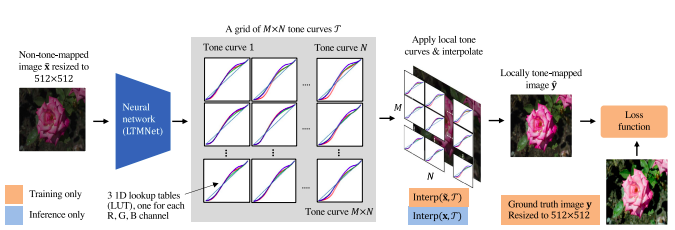

###Архитектура нейросети

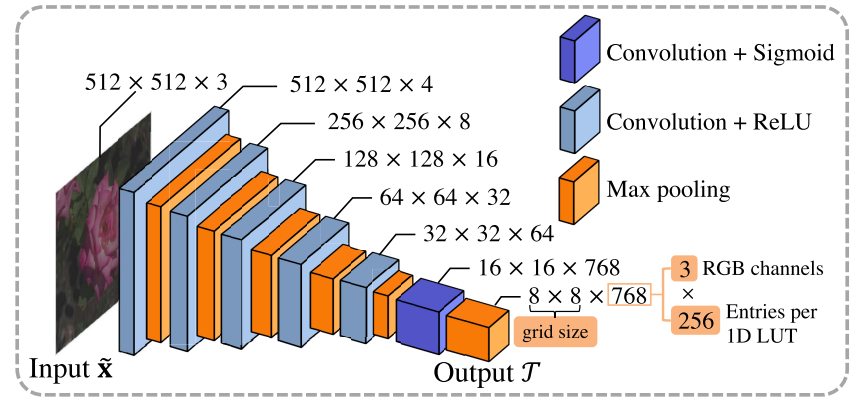

Размер первого слоя 512х512х4, за ним следует последовательность сверточных слоев с функцией активации ReLU и макс пулинги. Размер последнего слоя пулинга регулируется так, чтобы размер выхода соответствовал размеру кривых

### Loss function

In [ ]:
import tensorflow as tf

def ltm_loss(interp_im, gt_im, weight_map, residual=None, residual_weight=0.0, vgg=None):
    """
    :param residual_weight: weight of (LTMed image + residual) in L1 loss, only used when residual is not None
    :param residual: optional residual map to interpolated image
    :param interp_im: float32 (bs, h, w, c)
        if residual is not None, interp_im = pred_im + residual
        else, interp_im = pred_im
    :param gt_im: float32  (bs, h, w, c)
    :param weight_map: (h, w, 1)
    :return:
    """
    vgg_loss = 0.0
    if vgg is not None:
        x = tf.keras.applications.vgg19.preprocess_input(interp_im * 255)
        y = tf.keras.applications.vgg19.preprocess_input(gt_im * 255)
        x_feats = vgg(x)
        y_feats = vgg(y)
        num_layers = len(x_feats)
        vgg_loss = tf.add_n([tf.reduce_mean((x_feats[i] - y_feats[i]) ** 2) for i in range(num_layers)])
        vgg_loss /= num_layers

    if residual is not None:
        without_res_im = interp_im - residual  # recover the image without residual
        l1_without_res = tf.abs(gt_im - without_res_im)
        l1_with_res = tf.abs(gt_im - interp_im)
        l1 = (1 - residual_weight) * l1_without_res + residual_weight * l1_with_res
        l1_loss = tf.reduce_mean(weight_map * l1)
    else:
        l1_loss = tf.reduce_mean(weight_map * tf.abs(gt_im - interp_im))

    return l1_loss, vgg_loss

Функция потерь: используются две функции потерь: L1 и перцептуальная функция потерь

1) L1 минимизирует разницу в точности предсказанным изображениям и эталоном

2) В перцептуальной функции потерь используются два слоя VGG-19, обученных на ImageNet, которые минимизируют квадрат расстояния L2 между фичами прогнозируемого и целевого изображения (не берутся более глубокие слои VGG-19, т.к. изображения отличаются с точки зрения низкоуровневых характеристик, таких как яркость, контрастность и цветность)

usage: main.py
       
       [-h]

       [--eval]
       
       [--pretrained_model_dir PRETRAINED_MODEL_DIR]
       
       --dataset_dir
       DATASET_DIR
       
       --train_list_fn
       TRAIN_LIST_FN
       
       --val_list_fn
       VAL_LIST_FN
       
       --test_list_fn
       TEST_LIST_FN
       
       [--exp_dir EXP_DIR]
       
       [--exp_id EXP_ID]
       
       [--batch_size BATCH_SIZE]
       
       [--epochs EPOCHS]
       
       [--control_points CONTROL_POINTS]
       
       [--curves CURVES]
       
       [--grid_size GRID_SIZE [GRID_SIZE ...]]
       
       [--resize_to RESIZE_TO [RESIZE_TO ...]]
       
       [--ckpt_monitor CKPT_MONITOR]
       
       [--ckpt_monitor_mode CKPT_MONITOR_MODE]
       
       [--max_val_predictions MAX_VAL_PREDICTIONS]
       
       [--max_train_predictions MAX_TRAIN_PREDICTIONS]
       
       [--max_test_predictions MAX_TEST_PREDICTIONS]
       
       [--vgg_weight VGG_WEIGHT]
       
       [--l1_weight L1_WEIGHT]
       
       [--pix_weight PIX_WEIGHT [PIX_WEIGHT ...]]
       
       [--learning_rate LEARNING_RATE]
       
       [--learning_rate_schedule]
       
       [--aug_type AUG_TYPE]
       
       [--model_architecture MODEL_ARCHITECTURE]
       
       [--residual_layers RESIDUAL_LAYERS]
       
       [--residual_filters RESIDUAL_FILTERS]
       
       [--residual_weight RESIDUAL_WEIGHT]


In [ ]:
#example of running model
!python3 -m jobs.ltmnet_hdrplus_ds

/content/gdrive/MyDrive/ltmnet
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 172 kB in 1s (144 kB/

In [ ]:
#example of running pretrained model
!python3 main.py --dataset_dir ./hdrdata_out/ --train_list_fn ./hdrplus_images_train.txt --val_list_fn ./hdrplus_images_train.txt --test_list_fn ./hdrplus_images_test.txt --exp_dir ./exp_dir/ --exp_id ./exp_dir/exp_id/ --pretrained_model_dir ./pretrained_models/ltmnet_hdrplus_ds_model --eval

2023-01-11 18:57:13.469287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 18:57:14.457587: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-11 18:57:14.457710: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-01-11 18:57:14.457731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War